# Cryptocurrency Market Analyzer

In [46]:
# Import necessary libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Define API endpoint and parameters
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}# Set API headers
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

# Create a session and set headers
session = Session()
session.headers.update(headers)

# Make an initial API request to get cryptocurrency data
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [26]:
type(data)

dict

In [27]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-28-c869f2c7fecc>:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19597156.00000,19597156.00000,False,NaN,1,NaN,NaN,None,2024-01-13T01:01:00.000Z,42820.27082,43470842559.44530,-3.67560,0.04810,-7.51147,-2.93865,0.05516,18.06163,59.48467,839155527239.60693,50.22990,899225687239.08997,None,2024-01-13T01:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.309245
1,1027,Ethereum,ETH,ethereum,8234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120181390.28425,120181390.28425,True,NaN,2,NaN,NaN,None,2024-01-13T01:01:00.000Z,2520.38397,23744425148.27416,9.49770,-0.16960,-3.14082,11.26473,11.55461,23.80609,62.38253,302903249005.25757,18.10110,302903249005.26001,None,2024-01-13T01:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.309245
2,825,Tether USDt,USDT,tether,71243,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95010835101.64194,98602960963.43437,True,NaN,3,NaN,NaN,None,2024-01-13T01:00:00.000Z,1.00001,72107658056.51439,-5.58980,-0.00801,-0.00508,-0.08545,-0.03136,-0.00208,-0.01371,95011924874.57997,5.67780,98604091938.00999,None,2024-01-13T01:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-13 01:03:36.309245
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151689970.31932,151689970.31932,False,NaN,4,NaN,NaN,None,2024-01-13T01:00:00.000Z,294.15436,1190512313.16527,-8.75510,-0.83306,-4.80001,-4.48093,16.34538,22.99158,42.29181,44620266667.95666,2.66640,44620266667.96000,None,2024-01-13T01:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.309245
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432425703.25950,566889594.95251,True,NaN,5,NaN,NaN,None,2024-01-13T01:00:00.000Z,91.13156,2895709678.09782,-27.64460,-0.68459,-8.71045,-8.14171,30.23687,72.97744,316.58327,39407631042.82928,2.35490,51661535915.92000,None,2024-01-13T01:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.309245
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,None,2024-01-13T01:01:00.000Z,0.56987,1698899747.46999,-16.04390,-0.06340,-4.99141,-0.67880,-8.90008,-13.54158,17.31047,30925016743.31861,1.84800,56986968965.54000,None,2024-01-13T01:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.309245
6,3408,USDC,USDC,usd-coin,16164,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25368579395.77488,25368579395.77488,False,NaN,7,NaN,NaN,None,2024-01-13T01:00:00.000Z,1.00037,9193950935.02641,-4.38250,-0.01030,0.04306,0.03971,0.02337,0.05520,0.01663,25378063526.15820,1.51660,25378063526.16000,None,2024-01-13T01:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-13 01:03:36.309245
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35385892469.56100,36528237975.52500,False,NaN,8,NaN,NaN,None,2024-01-13T01:00:00.000Z,0.54460,684295265.85729,-37.77780,-0.49425,-6.48219,0.44668,-17.14745,55.09823,120.77554,19271015985.34859,1.15160,24506820623.12000,None,2024-01-13T01:00

In [29]:

def api_runner():
    # Use global DataFrame variable
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    # Make another API request
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Normalize the new data
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')

    # Append the new data to the existing DataFrame
    df = df.append(df2)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    # Save data to CSV file for persistence
    df.to_csv(r'/content/sample_data/API.csv', mode='a', header=False)

In [30]:
# Perform API requests every second for 60 seconds

import os
from time import time
from time import sleep

for i in range(60):
    api_runner()
    print('API Runner completed')
    sleep(1) #sleep for 1 second
exit()

<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-29-06029053b1f2>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-29-06029053b1f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
<ipython-input-29-06029053b1f2>:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyError: 'data'

In [31]:
# Read the saved CSV file into a new DataFrame

df72 = pd.read_csv(r'/content/sample_data/API.csv')
df72

,0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem', 'ftx-bankruptcy-estate']",21000000.0,19597156.0,19597156.0.1,False,Unnamed: 12,1.1,Unnamed: 14,Unnamed: 15,Unnamed: 16,2024-01-13T01:01:00.000Z,42820.27082090927,43470842559.445305,-3.6756,0.04809532,-7.51147323,-2.93864507,0.05516042,18.06162968,59.48466676,839155527239.6069,50.2299,899225687239.09,Unnamed: 30,2024-01-13T01:01:00.000Z.1,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,2024-01-13 01:03:36.730906
0,1,1027,Ethereum,ETH,ethereum,8234,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120181390.28425,120181390.28425,True,NaN,2,NaN,NaN,NaN,2024-01-13T01:01:00.000Z,2520.38397,23744425148.27416,9.49770,-0.16960,-3.14082,11.26473,11.55461,23.80609,62.38253,302903249005.25763,18.10110,302903249005.26001,NaN,2024-01-13T01:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.730906
1,2,825,Tether USDt,USDT,tether,71243,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,95010835101.64194,98602960963.43436,True,NaN,3,NaN,NaN,NaN,2024-01-13T01:00:00.000Z,1.00001,72107658056.51439,-5.58980,-0.00801,-0.00508,-0.08545,-0.03136,-0.00208,-0.01371,95011924874.57996,5.67780,98604091938.00999,NaN,2024-01-13T01:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-13 01:03:36.730906
2,3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151689970.31932,151689970.31932,False,NaN,4,NaN,NaN,NaN,2024-01-13T01:00:00.000Z,294.15436,1190512313.16527,-8.75510,-0.83306,-4.80001,-4.48093,16.34538,22.99158,42.29181,44620266667.95666,2.66640,44620266667.96000,NaN,2024-01-13T01:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.730906
3,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432425703.25950,566889594.95251,True,NaN,5,NaN,NaN,NaN,2024-01-13T01:00:00.000Z,91.13156,2895709678.09782,-27.64460,-0.68459,-8.71045,-8.14171,30.23687,72.97744,316.58327,39407631042.82928,2.35490,51661535915.92000,NaN,2024-01-13T01:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.730906
4,5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,NaN,2024-01-13T01:01:00.000Z,0.56987,1698899747.46999,-16.04390,-0.06340,-4.99141,-0.67880,-8.90008,-13.54158,17.31047,30925016743.31861,1.84800,56986968965.54000,NaN,2024-01-13T01:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:03:36.730906
5,6,3408,USDC,USDC,usd-coin,16164,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25368579395.77488,25368579395.77488,False,NaN,7,NaN,NaN,NaN,2024-01-13T01:00:00.000Z,1.00037,9193950935.02640,-4.38250,-0.01030,0.04306,0.03971,0.02337,0.05520,0.01663,25378063526.15820,1.51660,25378063526.16000,NaN,2024-01-13T01:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-13 01:03:36.730906
6,7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35385892469.56100,36528237975.52500,False,NaN,8,NaN,NaN,NaN,2024-01-13T01:00:00.000Z,0.54460,684295265.85729,-3

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19597156.00000,19597156.00000,False,NaN,1,NaN,NaN,None,2024-01-13T01:03:00.000Z,42866.35051,43449887490.16051,-3.62380,-0.08768,-7.37838,-2.74097,0.13036,18.18255,59.65671,840058558060.30298,50.28400,900193360672.66003,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
1,1027,Ethereum,ETH,ethereum,8234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120181390.28425,120181390.28425,True,NaN,2,NaN,NaN,None,2024-01-13T01:03:00.000Z,2519.75991,23731247369.22443,9.61090,-0.55952,-3.05409,11.33710,11.52790,23.76943,62.36795,302828249347.32288,18.12660,302828249347.32001,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
2,825,Tether USDt,USDT,tether,71243,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95010835101.64194,98602960963.43437,True,NaN,3,NaN,NaN,None,2024-01-13T01:02:00.000Z,0.99986,72052675945.09109,-5.48460,0.01035,-0.04881,-0.11765,-0.04478,-0.02953,-0.01920,94997078924.72833,5.68630,98588684699.32001,None,2024-01-13T01:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-13 01:04:47.211350
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151689970.31932,151689970.31932,False,NaN,4,NaN,NaN,None,2024-01-13T01:02:00.000Z,294.18243,1187007753.80172,-8.88050,-0.90778,-4.72194,-4.56283,16.29599,22.86650,42.26617,44624523569.51477,2.67110,44624523569.51000,None,2024-01-13T01:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432425703.25950,566889594.95251,True,NaN,5,NaN,NaN,None,2024-01-13T01:03:00.000Z,91.07910,2884232941.52713,-27.54140,-1.22092,-8.70147,-8.10768,29.99090,72.11031,316.03993,39384943996.50326,2.35750,51631794273.82000,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,None,2024-01-13T01:03:00.000Z,0.56970,1696689651.13209,-16.02420,-0.19413,-5.00388,-0.69772,-8.92747,-13.62961,17.27919,30915962784.91191,1.85060,56970284814.62000,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
6,3408,USDC,USDC,usd-coin,16164,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25368579395.77488,25368579395.77488,False,NaN,7,NaN,NaN,None,2024-01-13T01:03:00.000Z,1.00015,9189274677.57618,-4.32120,0.01211,0.00665,0.00862,0.02348,0.01443,0.00036,25372444964.18121,1.51870,25372444964.18000,None,2024-01-13T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-13 01:04:47.211350
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35385892469.56100,36528237975.52500,False,NaN,8,NaN,NaN,None,2024-01-13T01:02:00.000Z,0.54419,684354918.87714,-37.65240,-0.67056,-6.55708,0.39559,-17.67600,55.00220,120.58052,19256528756.25508,1.15270,24488397311.92000,None,2024-01-13T01:02:

In [33]:
# Set display format to avoid scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19597156.00000,19597156.00000,False,NaN,1,NaN,NaN,None,2024-01-13T01:03:00.000Z,42866.35051,43449887490.16051,-3.62380,-0.08768,-7.37838,-2.74097,0.13036,18.18255,59.65671,840058558060.30298,50.28400,900193360672.66003,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
1,1027,Ethereum,ETH,ethereum,8234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120181390.28425,120181390.28425,True,NaN,2,NaN,NaN,None,2024-01-13T01:03:00.000Z,2519.75991,23731247369.22443,9.61090,-0.55952,-3.05409,11.33710,11.52790,23.76943,62.36795,302828249347.32288,18.12660,302828249347.32001,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
2,825,Tether USDt,USDT,tether,71243,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95010835101.64194,98602960963.43437,True,NaN,3,NaN,NaN,None,2024-01-13T01:02:00.000Z,0.99986,72052675945.09109,-5.48460,0.01035,-0.04881,-0.11765,-0.04478,-0.02953,-0.01920,94997078924.72833,5.68630,98588684699.32001,None,2024-01-13T01:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-13 01:04:47.211350
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151689970.31932,151689970.31932,False,NaN,4,NaN,NaN,None,2024-01-13T01:02:00.000Z,294.18243,1187007753.80172,-8.88050,-0.90778,-4.72194,-4.56283,16.29599,22.86650,42.26617,44624523569.51477,2.67110,44624523569.51000,None,2024-01-13T01:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432425703.25950,566889594.95251,True,NaN,5,NaN,NaN,None,2024-01-13T01:03:00.000Z,91.07910,2884232941.52713,-27.54140,-1.22092,-8.70147,-8.10768,29.99090,72.11031,316.03993,39384943996.50326,2.35750,51631794273.82000,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,None,2024-01-13T01:03:00.000Z,0.56970,1696689651.13209,-16.02420,-0.19413,-5.00388,-0.69772,-8.92747,-13.62961,17.27919,30915962784.91191,1.85060,56970284814.62000,None,2024-01-13T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 01:04:47.211350
6,3408,USDC,USDC,usd-coin,16164,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25368579395.77488,25368579395.77488,False,NaN,7,NaN,NaN,None,2024-01-13T01:03:00.000Z,1.00015,9189274677.57618,-4.32120,0.01211,0.00665,0.00862,0.02348,0.01443,0.00036,25372444964.18121,1.51870,25372444964.18000,None,2024-01-13T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-13 01:04:47.211350
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35385892469.56100,36528237975.52500,False,NaN,8,NaN,NaN,None,2024-01-13T01:02:00.000Z,0.54419,684354918.87714,-37.65240,-0.67056,-6.55708,0.39559,-17.67600,55.00220,120.58052,19256528756.25508,1.15270,24488397311.92000,None,2024-01-13T01:02:

In [35]:
# Analyze coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.08768,-7.37838,-2.74097,0.13036,18.18255,59.65671
Ethereum,-0.55952,-3.05409,11.33710,11.52790,23.76943,62.36795
Tether USDt,0.01035,-0.04881,-0.11765,-0.04478,-0.02953,-0.01920
BNB,-0.90778,-4.72194,-4.56283,16.29599,22.86650,42.26617
Solana,-1.22092,-8.70147,-8.10768,29.99090,72.11031,316.03993
XRP,-0.19413,-5.00388,-0.69772,-8.92747,-13.62961,17.27919
USDC,0.01211,0.00665,0.00862,0.02348,0.01443,0.00036
Cardano,-0.67056,-6.55708,0.39559,-17.67600,55.00220,120.58052
Avalanche,-1.69439,-9.92866,-2.32349,-7.90976,120.83719,286.54727


In [36]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.08768
             quote.USD.percent_change_24h    -7.37838
             quote.USD.percent_change_7d     -2.74097
             quote.USD.percent_change_30d     0.13036
             quote.USD.percent_change_60d    18.18255
             quote.USD.percent_change_90d    59.65671
Ethereum     quote.USD.percent_change_1h     -0.55952
             quote.USD.percent_change_24h    -3.05409
             quote.USD.percent_change_7d     11.33710
             quote.USD.percent_change_30d    11.52790
             quote.USD.percent_change_60d    23.76943
             quote.USD.percent_change_90d    62.36795
Tether USDt  quote.USD.percent_change_1h      0.01035
             quote.USD.percent_change_24h    -0.04881
             quote.USD.percent_change_7d     -0.11765
             quote.USD.percent_change_30d    -0.04478
             quote.USD.percent_change_60d    -0.02953
             quote.USD.percent_change_90

In [37]:
type(df4)

pandas.core.series.Series

In [38]:
# Create a DataFrame with the stacked data

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.08768
            quote.USD.percent_change_24h  -7.37838
            quote.USD.percent_change_7d   -2.74097
            quote.USD.percent_change_30d   0.13036
            quote.USD.percent_change_60d  18.18255
            quote.USD.percent_change_90d  59.65671
Ethereum    quote.USD.percent_change_1h   -0.55952
            quote.USD.percent_change_24h  -3.05409
            quote.USD.percent_change_7d   11.33710
            quote.USD.percent_change_30d  11.52790
            quote.USD.percent_change_60d  23.76943
            quote.USD.percent_change_90d  62.36795
Tether USDt quote.USD.percent_change_1h    0.01035
            quote.USD.percent_change_24h  -0.04881
            quote.USD.percent_change_7d   -0.11765
            quote.USD.percent_change_30d  -0.04478
            quote.USD.percent_change_60d  -0.02953
            quote.USD.percent_change_90d  -0.01920
BNB         quote.USD.percent_change_1h   -0.90778
            quote.USD.percent_change_24h  -4.72194
            quote.USD.percent_change_7d   -4.56283
            quote.USD.percent_change_30d  16.29599
            quote.USD.percent_change_60d  22.86650
            quote.USD.percent_change_90d  42.26617
Solana      quote.USD.percent_change_1h   -1.22092
            quote.USD.percent_change_24h  -8.70147
            quote.USD.percent_change_7d   -8.10768
            quote.USD.percent_change_30d  29.99090
            quote.USD.percent_change_60d  72.11031
            quote.USD.percent_change_90d 316.03993
XRP         quote.USD.percent_change_1h   -0.19413
            quote.USD.percent_change_24h  -5.00388
            quote.USD.percent_change_7d   -0.69772
            quote.USD.percent_change_30d  -8.92747
            quote.USD.percent_change_60d -13.62961
            quote.USD.percent_change_90d  17.27919
USDC        quote.USD.percent_change_1h    0.01211
            quote.USD.percent_change_24h   0.00665
            quote.USD.percent_change_7d    0.00862
            quote.USD.percent_change_30d   0.02348
            quote.USD.percent_change_60d   0.01443
            quote.USD.percent_change_90d   0.00036
Cardano     quote.USD.percent_change_1h   -0.67056
            quote.USD.percent_change_24h  -6.55708
            quote.USD.percent_change_7d    0.39559
            quote.USD.percent_change_30d -17.67600
            quote.USD.percent_change_60d  55.00220
            quote.USD.percent_change_90d 120.58052
Avalanche   quote.USD.percent_change_1h   -1.69439
            quote.USD.percent_change_24h  -9.92866
            quote.USD.percent_change_7d   -2.32349
            quote.USD.percent_change_30d  -7.90976
            quote.USD.percent_change_60d 120.83719
            quote.USD.percent_change_90d 286.54727
Dogecoin    quote.USD.percent_change_1h   -0.35743
            quote.USD.percent_change_24h  -5.34267
            quote.USD.percent_change_7d   -3.11207
            quote.USD.percent_change_30d -17.10220
            quote.USD.percent_change_60d   8.46098
            quote.USD.percent_change_90d  34.20157
Polkadot    quote.USD.percent_change_1h   -0.52788
            quote.USD.percent_change_24h  -8.01850
            quote.USD.percent_change_7d    1.67954
            quote.USD.percent_change_30d   0.39247
            quote.USD.percent_change_60d  43.10940
            quote.USD.percent_change_90d 101.75836
TRON        quote.USD.percent_change_1h   -0.05729
            quote.USD.percent_change_24h   0.54560
            quote.USD.percent_change_7d    2.56599
            quote.USD.percent_change_30d   2.42636
            quote.USD.percent_change_60d   0.69498
            quote.USD.percent_change_90d  25.88471
Polygon     quote.USD.percent_change_1h   -0.85671
            quote.USD.percent_change_24h  -6.93572
            quote.USD.percent_change_7d    1.01174
            quote.USD.percent_change_30d  -3.45472
            quote.USD.percent_change_60d  -0.73032
            quo

In [39]:
df5.count()

values    90
dtype: int64

In [40]:
# Reset the index and display the DataFrame

index = pd.Index(range(90))

df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08768
1,Bitcoin,quote.USD.percent_change_24h,-7.37838
2,Bitcoin,quote.USD.percent_change_7d,-2.74097
3,Bitcoin,quote.USD.percent_change_30d,0.13036
4,Bitcoin,quote.USD.percent_change_60d,18.18255
5,Bitcoin,quote.USD.percent_change_90d,59.65671
6,Ethereum,quote.USD.percent_change_1h,-0.55952
7,Ethereum,quote.USD.percent_change_24h,-3.05409
8,Ethereum,quote.USD.percent_change_7d,11.33710
9,Ethereum,quote.USD.percent_change_30d,11.52790


In [41]:
# Change the column name for better clarity

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08768
1,Bitcoin,quote.USD.percent_change_24h,-7.37838
2,Bitcoin,quote.USD.percent_change_7d,-2.74097
3,Bitcoin,quote.USD.percent_change_30d,0.13036
4,Bitcoin,quote.USD.percent_change_60d,18.18255
5,Bitcoin,quote.USD.percent_change_90d,59.65671
6,Ethereum,quote.USD.percent_change_1h,-0.55952
7,Ethereum,quote.USD.percent_change_24h,-3.05409
8,Ethereum,quote.USD.percent_change_7d,11.33710
9,Ethereum,quote.USD.percent_change_30d,11.52790


In [42]:
# Replace percentage change labels for better readability

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.08768
1,Bitcoin,24h,-7.37838
2,Bitcoin,7d,-2.74097
3,Bitcoin,30d,0.13036
4,Bitcoin,60d,18.18255
5,Bitcoin,90d,59.65671
6,Ethereum,1h,-0.55952
7,Ethereum,24h,-3.05409
8,Ethereum,7d,11.33710
9,Ethereum,30d,11.52790


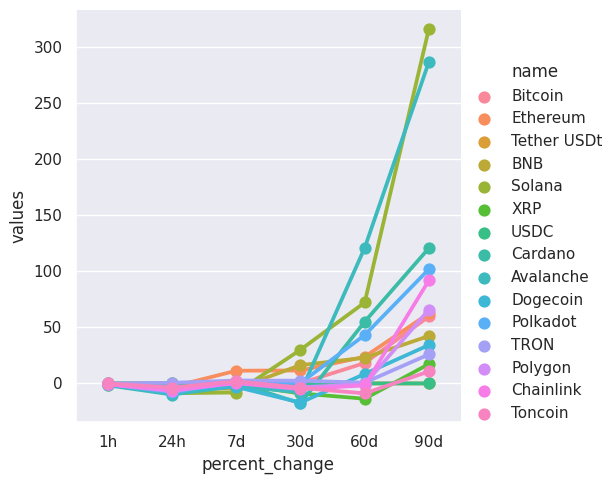

In [43]:
# Visualize percentage change trends using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')